## 1. Load the data into the pandas environment and identify some basic details of the dataset.


In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [179]:
data = pd.read_csv("employee.csv")
data.head()

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711


In [180]:
data.shape

(9, 7)

In [181]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


In [182]:
data.isna().sum()

name                 0
age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [183]:
data.dtypes

name                  object
age                  float64
income               float64
gender                object
department            object
grade                 object
performance_score      int64
dtype: object

In [184]:
data.columns

Index(['name', 'age', 'income', 'gender', 'department', 'grade',
       'performance_score'],
      dtype='object')

## 2. Reset the index as "name" as the index

In [185]:
data=data.set_index('name')
data.head()

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711


## 3. Select rows for specific names Jack Morgan and Josh wills.


In [186]:
data.loc[['Jack Morgan','Josh Wills']]

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


## 4. Select data for multiple values "Sales" and “Finance”.


In [187]:
data[(data['department']=='Sales')|(data['department']=='Finance')]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


## 5. Display employee who has more than 700 performance score.


In [188]:
data_new = data.loc[data['performance_score'] > 700]
print('\n Employees who have more than 700 performance score \n', data_new)


 Employees who have more than 700 performance score 
                 age   income gender  department grade  performance_score
name                                                                    
Allen Smith    45.0      NaN    NaN  Operations    G3                723
Dheeraj Patel  30.0  42000.0      F  Operations    G2                711
Josh Wills     54.0  52000.0      F     Finance    G3                901
Leo Duck       23.0  98000.0      M       Sales    G4                709


In [189]:
emp_score=data['performance_score']>700
print('emp_score',emp_score)
print("Total count is ",emp_score.astype(int).count())

emp_score name
Allen Smith       True
S Kumar          False
Jack Morgan      False
Ying Chin        False
Dheeraj Patel     True
Satyam Sharma    False
James Authur     False
Josh Wills        True
Leo Duck          True
Name: performance_score, dtype: bool
Total count is  9


## 6. Display employee who has more than 500 and less than 700 performance score


In [190]:
emplyee_score=[(data['performance_score']>500) & (data['performance_score']<700)]
print('employee score values greater than 500 and less than 700',emplyee_score)




employee score values greater than 500 and less than 700 [name
Allen Smith      False
S Kumar           True
Jack Morgan       True
Ying Chin         True
Dheeraj Patel    False
Satyam Sharma     True
James Authur     False
Josh Wills       False
Leo Duck         False
Name: performance_score, dtype: bool]


In [191]:
data[(data['performance_score']>500)&(data['performance_score']<700)]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


## 7. Check and handle missing values in the dataset.

In [192]:
for x in ['age','income']:
    data[x]=data[x].fillna(data[x].median())
import statistics
for i in ['gender']:
    data[i]=data[i].replace(np.NaN,statistics.mode(data[i]))

In [193]:
data.isna().sum()

age                  0
income               0
gender               0
department           0
grade                0
performance_score    0
dtype: int64

## 8. Check the outliers and handle outliers in performance score using Percentiles.


Text(0.5, 1.0, 'Performance Score of Employees')

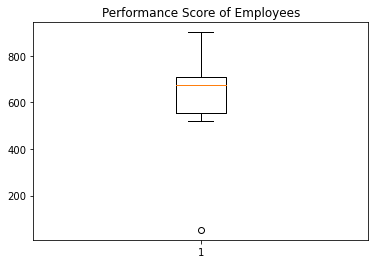

In [194]:
plt.boxplot(data['performance_score'])
plt.title('Performance Score of Employees')

In [195]:
Q1 = np.percentile(data['performance_score'], 25, interpolation='midpoint')
Q2 = np.percentile(data['performance_score'], 50, interpolation='midpoint')
Q3 = np.percentile(data['performance_score'], 75, interpolation='midpoint')

In [196]:
print(Q1)
print(Q2)
print(Q3)

556.0
674.0
711.0


In [197]:
IQR = Q3-Q1
low_lim = Q1- 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

In [198]:
print(low_lim)
print(up_lim)

323.5
943.5


In [199]:
outlier = []
for x in data['performance_score']:
    if(x>up_lim) or (x < low_lim):
        outlier.append(x)

In [200]:
outlier

[53]

In [201]:
ind1 = data['performance_score'] < low_lim
data.loc[ind1].index

Index(['James Authur'], dtype='object', name='name')

In [202]:
data.drop(['James Authur'],inplace = True)

Text(0.5, 1.0, 'Performance Score Of Employees')

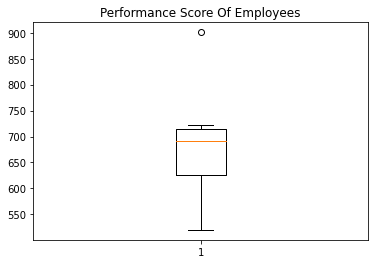

In [203]:
plt.boxplot(data['performance_score'])
plt.title('Performance Score Of Employees')

Text(0.5, 1.0, 'Income Of Employees')

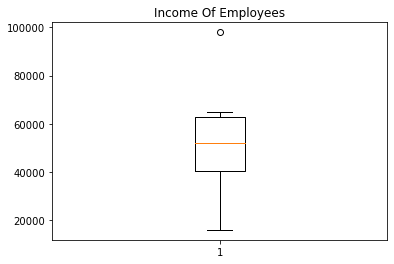

In [204]:
plt.boxplot(data['income'])
plt.title('Income Of Employees')

Text(0.5, 1.0, 'Age Of Employees')

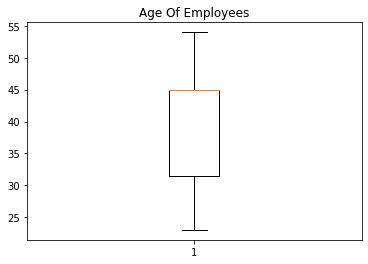

In [205]:
plt.boxplot(data['age'])
plt.title('Age Of Employees')

## 9. Check the gender column and do Dummy encoding.


In [206]:
gende=pd.get_dummies(data.gender)
gende
new=pd.concat((data,gende),axis=1)
new.head()
new.drop('gender',axis=1,inplace=True)
new.head() 
# for gender column only

,age,income,department,grade,performance_score,F,M
name,,,,,,,
Allen Smith,45.0,52000.0,Operations,G3,723,1,0
S Kumar,45.0,16000.0,Finance,G0,520,1,0
Jack Morgan,32.0,35000.0,Finance,G2,674,0,1
Ying Chin,45.0,65000.0,Sales,G3,556,1,0
Dheeraj Patel,30.0,42000.0,Operations,G2,711,1,0


## 10.Do the standard scaling on the feature performance score.

In [207]:
x=data['performance_score']
x.describe()

x=pd.DataFrame(x)
x

from sklearn import preprocessing
#create instance of standard scaling to a variable
standardisation= preprocessing.StandardScaler()
x= standardisation.fit_transform(x) #apply scaling to x and store it to x
x=pd.DataFrame(x)
x

x.describe()


,0
count,8.000000e+00
mean,4.857226e-17
std,1.069045e+00
min,-1.475872e+00
25%,-5.026938e-01
50%,1.023793e-01
75%,3.094385e-01
max,2.030331e+00
